In [1]:
%cd ..

/home/feodor/Jupyter/depth-poset


In [2]:
import numpy as np
import pandas as pd
import gudhi as gh
import matplotlib.pyplot as plt

from src.depth import DepthPoset
from src.transpositions import Transposition
from src.drow import plot_filtred_complex2d, plot_simplex, enumerate_points

# Define the complex to test

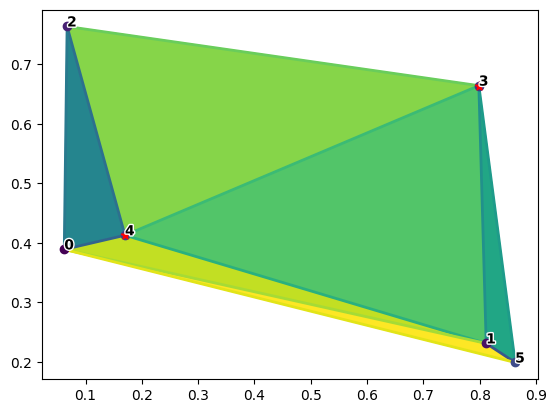

{'index 0': 3,
 'index 1': 4,
 'cell 0': (3,),
 'cell 1': (4,),
 'dim': 0,
 'type': 'birth-birth',
 'switch': 'no switch'}

In [3]:
points = np.random.random(size=[6, 2])

stree = gh.AlphaComplex(points).create_simplex_tree()
for i, (s, v) in list(enumerate(stree.get_filtration())):
    stree.assign_filtration(s, i)

plot_filtred_complex2d(stree, points, cmap='viridis')

order = [s for s, v in stree.get_filtration()]
dims = np.array([len(s) - 1 for s in order])
index0, index1 = np.random.choice(np.argwhere(dims[1:] == dims[:-1])[:, 0]) + np.arange(2)
cell0, cell1 = order[index0], order[index1]

plot_simplex(cell0, points, color='red', marker='*', linestyle='--', hatch='x')
plot_simplex(cell1, points, color='red', marker='*', linestyle='--', hatch='x')
enumerate_points(points, weight='semibold', forewidth=2)
plt.show()

transposition = Transposition.from_simplex_tree(stree, tuple(cell0), tuple(cell1))
transposition.to_dict()